# Homework Assignment 1
### [The Art of Analyzing Big Data - The Data Scientist’s Toolbox](https://www.ise.bgu.ac.il/labs/fire/lectures.html)
#### By Dr. Michael Fire 

For this homework you will need to write code that analyzes real-world datasets. The code needs to be written in Python using the [sqlite3](https://docs.python.org/2/library/sqlite3.html) package. 

**Please note:** You need to answer only the questions that match your ID first digit.

# 1. Babies Names Dataset (35pt)

**Task 1 (for everyone):** Write a code that uses the  [**babies names dataset** ](https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv) (use NationalNames.csv) and creates a table named (Names) with the dataset data and the following columns: 'State', 'Gender', 'Name', 'Count' , and 'Year' (5pt)
**Bonus:** Load the data using a Batch INSERT SQL Query (2pt)

In [ ]:
# Installing the Kaggle package
!pip install --upgrade kaggle 

In [2]:
# Imports
import json
import os

In [3]:
# Create kaggle directory
!mkdir /root/.kaggle/

api_token = {"username":"amitdamri","key":"a076ad6676498fde930f6aacbda924c4"}

# creating kaggle.json file with the personal API-Key details 
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/us-baby-name

# download the dataset from Kaggle and unzip it
!kaggle datasets download kaggle/us-baby-names -f StateNames.csv -p ./datasets/us-baby-name/StateNames
!chdir ./datasets/us-baby-name/StateNames
!unzip ./datasets/us-baby-name/StateNames/*.zip  -d ./datasets/us-baby-name/StateNames

In [5]:
import sqlite3
import csv
import pandas as pd

In [6]:
# create database in memory
try:
  con = sqlite3.connect(':memory:')
except Exception as e:
  print(e)

In [7]:
# Create table 'Names' with the required columns
cur = con.cursor()
cur.execute("CREATE TABLE Names (State, Gender, Name, Count Integer, Year)")
cur.close()

In [8]:
# Read data from csv file
csv_file = open("./datasets/us-baby-name/StateNames/StateNames.csv")
all_rows = csv.reader(csv_file)
header = next(all_rows) # skim header row

In [9]:
# Load data into Names table using a Batch Insert SQL query
cur = con.cursor()
cur.executemany("INSERT INTO Names (Name, Year, Gender, State, Count) VALUES (?,?,?,?,?)", 
                ((rec[1],rec[2],rec[3],rec[4],rec[5]) for rec in all_rows))
cur.close()

In [10]:
# Show dataframe
cur = con.cursor()
cur.execute("SELECT * FROM Names")
df = pd.DataFrame(cur.fetchall())
df.columns = [column[0] for column in cur.description]
print(df.head())
cur.close()

  State Gender      Name  Count  Year
0    AK      F      Mary     14  1910
1    AK      F     Annie     12  1910
2    AK      F      Anna     10  1910
3    AK      F  Margaret      8  1910
4    AK      F     Helen      7  1910


**Task 2 (for everyone):** Write a query that returns the statistics for the name Mary (5pt). Use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run (5pt). **Bonus:** [Create an index](https://www.w3schools.com/sql/sql_create_index.asp)  on the _Name_ column and use the [the timeit package](https://docs.python.org/3/library/timeit.html) to measure the time it takes the query to run with the index (5pt)

In [11]:
import timeit

In [25]:
cur = con.cursor()
print("Mary Statistics: ", cur.execute("SELECT Year, SUM(Count), AVG(Count) FROM Names WHERE Name='Mary' GROUP BY Year").fetchall())
cur.close()

Mary Statistics:  [('1910', 22907, 388.2542372881356), ('1911', 24450, 414.40677966101697), ('1912', 32376, 530.7540983606557), ('1913', 36726, 582.952380952381), ('1914', 45430, 732.741935483871), ('1915', 58293, 910.828125), ('1916', 61552, 961.75), ('1917', 64392, 990.6461538461539), ('1918', 67490, 1054.53125), ('1919', 65950, 1030.46875), ('1920', 71136, 1016.2285714285714), ('1921', 74135, 1074.4202898550725), ('1922', 72312, 1063.4117647058824), ('1923', 71802, 1025.7428571428572), ('1924', 73706, 1023.6944444444445), ('1925', 70816, 983.5555555555555), ('1926', 68057, 958.5492957746479), ('1927', 70868, 984.2777777777778), ('1928', 67140, 860.7692307692307), ('1929', 63801, 828.5844155844156), ('1930', 64427, 870.6351351351351), ('1931', 60587, 786.8441558441558), ('1932', 60155, 791.5131578947369), ('1933', 55772, 743.6266666666667), ('1934', 57177, 783.2465753424658), ('1935', 55314, 727.8157894736842), ('1936', 54629, 700.3717948717949), ('1937', 55883, 745.1066666666667), (

In [12]:
# setup table
query_setup = """
import sqlite3
import csv
con = sqlite3.connect(':memory:')
cur = con.cursor()
cur.execute("CREATE TABLE Names (State, Gender, Name, Count Integer, Year)")
csv_file = open("./datasets/us-baby-name/StateNames/StateNames.csv")
all_rows = csv.reader(csv_file)
header = next(all_rows)
cur.executemany("INSERT INTO Names (Name, Year, Gender, State, Count) VALUES (?,?,?,?,?)", 
                ((rec[1],rec[2],rec[3],rec[4],rec[5]) for rec in all_rows))
""" 

# execute query
query_stmt = """cur.execute("SELECT Year, SUM(Count) FROM Names WHERE Name='Mary' GROUP BY Year")"""
wout_index_time = timeit.timeit(query_stmt, query_setup, number=1)
print(wout_index_time)

0.4499467269999968


In [17]:
# Validation
cur = con.cursor()
%timeit cur.execute("SELECT Year, SUM(Count), AVG(Count) FROM Names WHERE Name='Mary' GROUP BY Year")
cur.close()

1 loop, best of 5: 450 ms per loop


In [20]:
# Bonus

# setup table
query_setup = """
import sqlite3
import csv
con = sqlite3.connect(':memory:')

cur = con.cursor()
cur.execute("CREATE TABLE Names (State, Gender, Name, Count Integer, Year)")

csv_file = open("./datasets/us-baby-name/StateNames/StateNames.csv")
all_rows = csv.reader(csv_file)
header = next(all_rows)
cur.executemany("INSERT INTO Names (Name, Year, Gender, State, Count) VALUES (?,?,?,?,?)", 
                ((rec[1],rec[2],rec[3],rec[4],rec[5]) for rec in all_rows))

cur.execute("CREATE INDEX idx_name ON Names (Name)")
"""

# execute query
query_stmt = """cur.execute("SELECT Year, SUM(Count), AVG(Count) FROM Names WHERE Name='Mary' GROUP BY Year") """
with_index_time = timeit.timeit(query_stmt, query_setup, number=1)
print(with_index_time)

0.01377310899999884


In [21]:
# Bonus - - Validation
cur = con.cursor()
cur.execute("CREATE INDEX idx_name ON Names (Name)")
%timeit cur.execute("SELECT Year, SUM(Count), AVG(Count) FROM Names WHERE Name='Mary' GROUP BY Year")
cur.close()

100 loops, best of 5: 9.58 ms per loop


### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **<YOUR_ID> mod 4 +1**) </span>

In [22]:
# which question to answer - put your ID number and run the code 
your_id  = "312199698"
q = int(your_id) % 4 + 1
print("You need to answer question number %s" % q)

You need to answer question number 3


***Question 1:*** Write a function that returns how many babies were born in a given state in a given year.
Use it to calculate the number of babies born in TX in 1986 (10pt)

***Question 2:*** Write a function that returns how many female babies were born between a given range of years.
Use it to calculate how many babies were born between 1988 and 1995  (10pt)

**Question 3:** Write a function that returns the most common female name in a given state. Use it to calculate the most common female name in Wasington in 1987 (10pt)

In [23]:
def most_common_female_name_in_state(state_name):
  gender = 'F'
  year = '1987'
  cur = con.cursor()
  print(cur.execute("""SELECT Name FROM (SELECT Name, MAX(Count) FROM Names WHERE Gender=? AND State=? AND Year=?)""",
                    (gender, state_name, year,)).fetchone())
  cur.close()

In [24]:
most_common_female_name_in_state('WA')

('Jessica',)


**Question 4:** Write a function that returns how many male babies named _Robert where born in a given state in a given year. Use it to find the state in which the highest number of babies _Robert_ where born in 2010 (10pt)

**Question (for everyone):** For the state of CA write code that calculates the second most popular female/male names in each decade (10pt). **Bonus**: Visualize it somehow using Matplotlib (5pt)

In [26]:
def second_most_popular_name_in_decade(state_name):
  cur = con.cursor()
  query = """ 
  SELECT Name, decade, Max(decade_count) 
  FROM (
  SELECT Name, SUBSTR(Year,1,3) || '0s' as decade, Sum(Count) as decade_count 
  FROM Names 
  WHERE State=? 
  GROUP BY Name, SUBSTR(Year,1,3))
  WHERE decade_count < 
  (SELECT Max(decade_count) 
  FROM 
  (SELECT Name, SUBSTR(Year,1,3) || '0s' as decade, Sum(Count) as decade_count 
  FROM Names 
  WHERE State=?
  GROUP BY Name, SUBSTR(Year,1,3)) 
  Group by decade)
  Group by decade
  """
  data = (state_name, state_name)
  result = cur.execute(query, data).fetchall()
  cur.close()
  return result

In [27]:
result = second_most_popular_name_in_decade('CA')
print(result)

[('John', '1910s', 7826), ('Charles', '1920s', 7358), ('Betty', '1930s', 7856), ('Daniel', '1940s', 8239), ('Lori', '1950s', 8215), ('Theresa', '1960s', 8249), ('Rachel', '1970s', 7996), ('Erika', '1980s', 8121), ('Jeremy', '1990s', 8267), ('Diana', '2000s', 8268), ('Joseph', '2010s', 8246)]


In [29]:
# Bonus - Visulalization
decades = [res[1] for res in result]
names = [res[0] for res in result]
counts = [res[2] for res in result]

decades.reverse()
names.reverse()
counts.reverse()

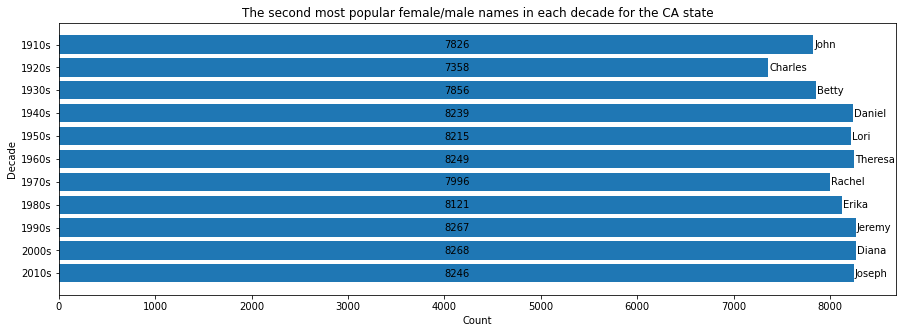

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

def visualize_result():
  f, ax = plt.subplots(figsize=(15,5))
  plt.barh(y=decades, width=counts, align= 'center')  
  for index, value in enumerate(counts):
    plt.text(value + 10, index - 0.15, str(names[index]))
  for index, value in enumerate(counts):
    plt.text(4000, index - 0.15, str(value))
  plt.xlabel("Count")
  plt.ylabel("Decade")
  plt.title("The second most popular female/male names in each decade for the CA state")
visualize_result()

# 2. Flavors of Cacao Dataset (15pt)

Using the [Flavors of Cacao](https://www.kaggle.com/rombikuboktaeder/choco-flavors) dataset, answer the following questions:

**Load Data** from kaggle

In [ ]:
# Download kaggle dataset
!kaggle datasets download -d rombikuboktaeder/choco-flavors -p ./datasets/flavors-of-cacao/
!chdir ./datasets/flavors-of-cacao
!unzip ./datasets/flavors-of-cacao/*.zip -d ./datasets/flavors-of-cacao/

In [34]:
# Create database in memory
try:
  con = sqlite3.connect(':memory:')
except Exception as e:
  print(e)

In [35]:
# Create table Flavors with all its columns
cur = con.cursor()
cur.execute("""CREATE TABLE Flavors (Company, Specific Bean Originor Bar Name, Ref, 
               ReviewDate, CocoaPercent, CompanyLocation, Rating, BeanType, Broad BeanOrigin)""")
cur.close()

In [36]:
# Load csv file
csv_file = open("./datasets/flavors-of-cacao//flavors_of_cacao.csv")
all_rows = csv.reader(csv_file)
header = next(all_rows) # remove header

In [37]:
# Load data into flavors table
cur = con.cursor()
cur.executemany("INSERT INTO Flavors VALUES (?,?,?,?,?,?,?,?,?)", 
                all_rows)
cur.close()

In [38]:
# Show table as dataframe
cur = con.cursor()
cur.execute("SELECT * FROM Flavors")
df = pd.DataFrame(cur.fetchall())
df.columns = [column[0] for column in cur.description]
print(df.head())
cur.close()

    Company     Specific   Ref  ... Rating BeanType     Broad
0  A. Morin  Agua Grande  1876  ...   3.75           Sao Tome
1  A. Morin        Kpime  1676  ...   2.75               Togo
2  A. Morin       Atsane  1676  ...      3               Togo
3  A. Morin        Akata  1680  ...    3.5               Togo
4  A. Morin       Quilla  1704  ...    3.5               Peru

[5 rows x 9 columns]


**Question 1:** Write a function that returns the number of bars manufactured where the bars' BroadBean Origin is a given country. Use the function to calculate the number of bars where BroadBean Origin is 'Fiji' (15pt)

**Question 2:** Write a function that returns the maximal and average cocoa percentage in a bar manufactured by a company in a specific country. Use the function to calculate the minimal and average cocoa percentage in bars manufactured by a Swiss company (15pt).

**Question 3:** Calculate the second most common bean type(s) and the most rare bean type(s) (15
pt)

In [39]:
# The second most common
cur = con.cursor()
query = """ SELECT BeanType, type_count 
FROM 
(SELECT BeanType, Count(BeanType) as type_count 
FROM Flavors 
WHERE BeanType != '\xa0' 
GROUP BY BeanType)

WHERE type_count = 
  (SELECT MAX(type_count) 
  FROM 
    (SELECT Count(BeanType) as type_count 
    FROM Flavors 
    WHERE BeanType != '\xa0' 
    GROUP BY BeanType)

  WHERE type_count < 
    (SELECT MAX(type_count) 
    FROM 
      (SELECT Count(BeanType) as type_count 
      FROM Flavors 
      WHERE BeanType != '\xa0' 
      GROUP BY BeanType)))
"""
data = ()
result = cur.execute(query, data).fetchall()
print(f"The second most common bean type(s): {result}")

The second most common bean type(s): [('Criollo', 153)]


In [40]:
# The most rare
cur = con.cursor()
query = """ SELECT BeanType, type_count 
FROM (SELECT BeanType, Count(BeanType) as type_count FROM Flavors GROUP BY BeanType)
WHERE BeanType!= '' AND type_count = (SELECT MIN(type_count) 
FROM (SELECT Count(BeanType) as type_count FROM Flavors GROUP BY BeanType))
"""
data = ()
result = cur.execute(query, data).fetchall()
print(f"The most rare bean type(s): {result}")

The most rare bean type(s): [('Amazon', 1), ('Blend-Forastero,Criollo', 1), ('CCN51', 1), ('Criollo (Ocumare 67)', 1), ('Criollo (Ocumare 77)', 1), ('Criollo (Ocumare)', 1), ('Criollo (Wild)', 1), ('Criollo, +', 1), ('Forastero (Amelonado)', 1), ('Forastero (Arriba) ASSS', 1), ('Forastero(Arriba, CCN)', 1), ('Forastero, Trinitario', 1), ('Trinitario (Amelonado)', 1), ('Trinitario (Scavina)', 1), ('Trinitario, Nacional', 1), ('Trinitario, TCGA', 1)]


**Question 4:** Calculate the number of reviews and the average rating in each year. Calculate the number of reviews and the average rating of each company in each year (15pt)

# 3. Kickstarter Projects Dataset (25pt)

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv), answer the following questions:

In [41]:
# Download kaggle dataset
!kaggle datasets download -d kemical/kickstarter-projects -p ./datasets/kickstarter-projects/
!chdir ./datasets/kickstarter-projects
!unzip ./datasets/kickstarter-projects/*.zip -d ./datasets/kickstarter-projects/

**Task 1 (for everyone):** Load the dataset to SQLite DB using [PonyORM](https://ponyorm.org) (10pt)

In [ ]:
!pip install pony

In [43]:
import datetime
import pandas as pd
from pony.orm import *

In [44]:
# load csv and fill na values
df = pd.read_csv("./datasets/kickstarter-projects/ks-projects-201801.csv")
print(f"Columns with null values: {df.columns[df.isna().any()].tolist()}")
print(f"Number of names with null value: {df['name'].isna().sum()}")
print(f"Number of usd_pledged with null value: {df['usd pledged'].isna().sum()}")
df['name'].fillna('Null_Name', inplace=True)
df['usd pledged'].fillna(-1, inplace=True)
print(f"Columns with null values: {df.columns[df.isna().any()].tolist()}")
df.head()

Columns with null values: ['name', 'usd pledged']
Number of names with null value: 4
Number of usd_pledged with null value: 3797
Columns with null values: []


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [45]:
# Creating a new database
db = Database()
db.bind(provider='sqlite', filename=':memory:', create_db=True)

# The class will be map to a table
class Project(db.Entity):
    name = Required(str)
    category = Required(str)
    main_category = Required(str)
    curreny = Required(str)
    deadline = Required(datetime.date)
    goal = Required(float)
    launched = Required(datetime.datetime)
    pledged = Required(float)
    state = Required(str)
    backers= Required(float)
    country = Required(str)
    usd_pledged = Optional(float)
    usd_pledged_real = Required(float)
    usd_goal_real = Required(float)

In [46]:
show(Project)

class Project(Entity):
    id = PrimaryKey(int, auto=True)
    name = Required(str)
    category = Required(str)
    main_category = Required(str)
    curreny = Required(str)
    deadline = Required(date)
    goal = Required(float)
    launched = Required(datetime)
    pledged = Required(float)
    state = Required(str)
    backers = Required(float)
    country = Required(str)
    usd_pledged = Optional(float)
    usd_pledged_real = Required(float)
    usd_goal_real = Required(float)


In [47]:
set_sql_debug(True) # helps to see what SQL commands are running
db.generate_mapping(create_tables=True) # create tables

GET CONNECTION FROM THE LOCAL POOL
PRAGMA foreign_keys = false
BEGIN IMMEDIATE TRANSACTION
CREATE TABLE "Project" (
  "id" INTEGER PRIMARY KEY AUTOINCREMENT,
  "name" TEXT NOT NULL,
  "category" TEXT NOT NULL,
  "main_category" TEXT NOT NULL,
  "curreny" TEXT NOT NULL,
  "deadline" DATE NOT NULL,
  "goal" REAL NOT NULL,
  "launched" DATETIME NOT NULL,
  "pledged" REAL NOT NULL,
  "state" TEXT NOT NULL,
  "backers" REAL NOT NULL,
  "country" TEXT NOT NULL,
  "usd_pledged" REAL,
  "usd_pledged_real" REAL NOT NULL,
  "usd_goal_real" REAL NOT NULL
)

SELECT "Project"."id", "Project"."name", "Project"."category", "Project"."main_category", "Project"."curreny", "Project"."deadline", "Project"."goal", "Project"."launched", "Project"."pledged", "Project"."state", "Project"."backers", "Project"."country", "Project"."usd_pledged", "Project"."usd_pledged_real", "Project"."usd_goal_real"
FROM "Project" "Project"
WHERE 0 = 1

COMMIT
PRAGMA foreign_keys = true
CLOSE CONNECTION


In [48]:
# Load data into table
for idx, row in df.iterrows():
  Project(
    name = row['name'],
    category = row['category'],
    main_category = row["main_category"],
    curreny =row["currency"],
    deadline = row["deadline"],
    goal = row["goal"],
    launched = row["launched"],
    pledged = row["pledged"],
    state =row["state"],
    backers=row["backers"],
    country =row["country"],
    usd_pledged = row["usd pledged"],
    usd_pledged_real = row["usd_pledged_real"],
    usd_goal_real = row["usd_goal_real"]
    )

In [49]:
# Commit changes
commit()

Streaming output truncated to the last 5000 lines.

INSERT INTO "Project" ("name", "category", "main_category", "curreny", "deadline", "goal", "launched", "pledged", "state", "backers", "country", "usd_pledged", "usd_pledged_real", "usd_goal_real") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
["Spy in the Teachers' Lounge - Illustrated Young Adult Novel", 'Young Adult', 'Publishing', 'USD', '2015-08-24', 1500.0, '2015-07-16 05:58:11.000000', 280.0, 'failed', 8.0, 'US', 280.0, 280.0, 1500.0]

INSERT INTO "Project" ("name", "category", "main_category", "curreny", "deadline", "goal", "launched", "pledged", "state", "backers", "country", "usd_pledged", "usd_pledged_real", "usd_goal_real") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
['Double Barrel Theatre Presents 2015', 'Webcomics', 'Comics', 'USD', '2014-08-27', 500.0, '2014-07-28 11:39:02.000000', 1.0, 'failed', 1.0, 'US', 1.0, 1.0, 500.0]

INSERT INTO "Project" ("name", "category", "main_category", "curreny", "deadline", "go

### <span style="color:red"> Please answer only **one** of the following questions according to your ID number (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [50]:
# which question to answer - put your ID number and run the code 
your_id  = "312199698"
q = int(your_id) % 3 + 1
print("You need to answer question number %s" % q)

You need to answer question number 1


**Question 1:** On average which project category received the highest number of backers? (15 pt)

In [53]:
project_category = max([b for b in select((p.category, avg(p.backers)) for p in Project)], key=lambda x:x[1])
print(f"""On average the project category which received the highest number of backers is: {project_category[0]}
and its number of backers is {project_category[1]}""")

SELECT "p"."category", AVG("p"."backers")
FROM "Project" "p"
GROUP BY "p"."category"

On average the project category which received the highest number of backers is: Chiptune
and its number of backers is 443.9428571428571


In [54]:
# validation using pandas
df.groupby('category')["backers"].mean().sort_values(ascending=False)

category
Chiptune            443.942857
Camera Equipment    432.545673
Tabletop Games      426.601199
Wearables           389.935929
Video Games         373.584531
                       ...    
Embroidery           14.053097
Places               12.423545
Couture              12.076364
Candles              11.743590
Crochet               7.851852
Name: backers, Length: 159, dtype: float64

**Question 2:** On average which project category received the highest pledged USD? (15 pt)

**Question 3:** In which month occurred the highest number of projects? (15 pt)

# 4. Oscars Datasets (10pt)

Using the [Oscars Dataset](https://www.kaggle.com/theacademy/academy-awards), please answer only one of the following questions (you can chose):

In [ ]:
# Download kaggle dataset
!kaggle datasets download -d theacademy/academy-awards -p ./datasets/academy-awards/
!chdir ./datasets/academy-awards
!unzip ./datasets/academy-awards/*.zip -d ./datasets/academy-awards/

In [56]:
# load csv data into datafarme and fill nan values 
df = pd.read_csv("./datasets/academy-awards/database.csv")
print(f"Columns with null values: {df.columns[df.isna().any()].tolist()}")
print(f"Number of winners with null values: {df['Winner'].isna().sum()}")
print(f"Number of films with null values: {df['Film'].isna().sum()}")
print(df['Winner'].unique()) # only 1 -> can add 0 for nan values
df['Winner'].fillna(0, inplace=True)
df['Film'].fillna('NA', inplace=True)
df['Name'] = df['Name'].str.lower()
df['Award'] = df['Award'].str.lower()
df.head()

Columns with null values: ['Winner', 'Film']
Number of winners with null values: 7643
Number of films with null values: 333
[nan  1.]


,Year,Ceremony,Award,Winner,Name,Film
0,1927/1928,1,actor,0.0,richard barthelmess,The Noose
1,1927/1928,1,actor,1.0,emil jannings,The Last Command
2,1927/1928,1,actress,0.0,louise dresser,A Ship Comes In
3,1927/1928,1,actress,1.0,janet gaynor,7th Heaven
4,1927/1928,1,actress,0.0,gloria swanson,Sadie Thompson


In [57]:
from pony.orm import *
# Creating a new database
db = Database()
db.bind(provider='sqlite', filename=':memory:')

# The class will be map to a table
class Oscar(db.Entity):
    year = Optional(str)
    ceremony = Optional(int)
    award = Required(str)
    winner = Required(int)
    name = Required(str)
    film = Optional(str)

show(Oscar)
set_sql_debug(True) # helps to see what SQL commands are running
db.generate_mapping(create_tables=True) # create tables

GET NEW CONNECTION
RELEASE CONNECTION
class Oscar(Entity):
    id = PrimaryKey(int, auto=True)
    year = Optional(str, default='')
    ceremony = Optional(int)
    award = Required(str)
    winner = Required(int)
    name = Required(str)
    film = Optional(str, default='')
GET CONNECTION FROM THE LOCAL POOL
PRAGMA foreign_keys = false
BEGIN IMMEDIATE TRANSACTION
CREATE TABLE "Oscar" (
  "id" INTEGER PRIMARY KEY AUTOINCREMENT,
  "year" TEXT NOT NULL,
  "ceremony" INTEGER,
  "award" TEXT NOT NULL,
  "winner" INTEGER NOT NULL,
  "name" TEXT NOT NULL,
  "film" TEXT NOT NULL
)

SELECT "Oscar"."id", "Oscar"."year", "Oscar"."ceremony", "Oscar"."award", "Oscar"."winner", "Oscar"."name", "Oscar"."film"
FROM "Oscar" "Oscar"
WHERE 0 = 1

COMMIT
COMMIT
PRAGMA foreign_keys = true
CLOSE CONNECTION
RELEASE CONNECTION


In [58]:
# Create Entities
for idx, row in df.iterrows():
  Oscar(
    year = row['Year'],
    ceremony = row["Ceremony"],
    award = row['Award'],
    winner = int(row['Winner']),
    name = row['Name'],
    film = row['Film']
  )

In [59]:
# Commit changes
commit()

Streaming output truncated to the last 5000 lines.

INSERT INTO "Oscar" ("year", "ceremony", "award", "winner", "name", "film") VALUES (?, ?, ?, ?, ?, ?)
['2002', 75, 'actress in a supporting role', 1, 'catherine zeta-jones', 'Chicago']

INSERT INTO "Oscar" ("year", "ceremony", "award", "winner", "name", "film") VALUES (?, ?, ?, ?, ?, ?)
['2002', 75, 'animated feature film', 0, 'ice age', 'Chris Wedge']

INSERT INTO "Oscar" ("year", "ceremony", "award", "winner", "name", "film") VALUES (?, ?, ?, ?, ?, ?)
['2002', 75, 'animated feature film', 0, 'lilo & stitch', 'Chris Sanders']

INSERT INTO "Oscar" ("year", "ceremony", "award", "winner", "name", "film") VALUES (?, ?, ?, ?, ?, ?)
['2002', 75, 'animated feature film', 0, 'spirit: stallion of the cimarron', 'Jeffrey Katzenberg']

INSERT INTO "Oscar" ("year", "ceremony", "award", "winner", "name", "film") VALUES (?, ?, ?, ?, ?, ?)
['2002', 75, 'animated feature film', 1, 'spirited away', 'Hayao Miyazaki']

INSERT INTO "Oscar" ("year", "cer

**Question 1:** Who is the male actress with the most Oscar nominees? (10pt)

In [60]:
# get all actor options
for s in df['Award'].unique():
  if s.startswith('actor'):
    print(s)

actor
actor in a supporting role
actor in a leading role


In [61]:
actor = max([d for d in select((o.name, count(o)) for o in Oscar if o.award.startswith('actor'))], key=lambda x:x[1])
print(f"The male actor with the most Oscar nominees is: **{actor[0]}** and his number of nominees is: **{actor[1]}**")

BEGIN IMMEDIATE TRANSACTION
SELECT "o"."name", COUNT(DISTINCT "o"."id")
FROM "Oscar" "o"
WHERE "o"."award" LIKE 'actor%'
GROUP BY "o"."name"

The male actor with the most Oscar nominees is: **jack nicholson** and his number of nominees is: **12**


In [62]:
# validation
df[df['Award'].str.startswith('actor')].groupby('Name')['Award'].count().sort_values(ascending=False)

Name
jack nicholson        12
laurence olivier       9
spencer tracy          9
paul newman            9
al pacino              8
                      ..
louis calhern          1
louis gossett, jr.     1
mako                   1
mark rylance           1
adolph caesar          1
Name: Award, Length: 458, dtype: int64

**Question 2:** Who is the female director with the most Oscar nominees? (10pt)

**Question 3:** Which top-10 movies received the highest number of Oscar nominees? (10pt)

**Question 4:** Write a function that receives an actor's name and returns the actor’s number of Oscar nominees. Use the function to calculate the number of times Leonardo DiCaprio was a nominee (10pt)

# 5. Select a Dataset (15pt)

**Open Question:** Select an interesting dataset and use SQL to discover something interesting (15pt). **Bonus:** Use BigQuery (2pt)

In [63]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


I chose the chicago crime BigQuery dataset. Grouped the data by the hour the of the crime and discoverd that most of the crimes happened between 12pm to 12am.


In [64]:
# fit-drive-330016 - it's my project, it was created on google cloud platform in order to use google bigquery datasets.
%%bigquery --project fit-drive-330016
SELECT 
  SUBSTR(CAST(date AS string), 12, 2) as prefix_hour, COUNT(*) as crimes_per_hour
FROM `bigquery-public-data.chicago_crime.crime`
GROUP BY prefix_hour
ORDER BY crimes_per_hour DESC

,prefix_hour,crimes_per_hour
0,12,425681
1,19,420145
2,20,419125
3,00,413624
4,21,407339
5,18,406824
6,22,401197
7,15,395023
8,17,380672
9,14,375663
